# CLASSIFY TRAFFIC SIGNS USING LE-NET ARCHITECTURE IN KERAS¶

Images of traffic signs and the goal is to train a Deep Network to classify them


The dataset contains 43 different classes of images.


Classes are as listed below:


- ( 0, **'Speed limit (20km/h)')**   
- ( 1, **'Speed limit (30km/h)')**
- ( 2, **'Speed limit (50km/h)')** 
- ( 3, **'Speed limit (60km/h)')**
- ( 4, **'Speed limit (70km/h)')**   
- ( 5, **'Speed limit (80km/h)')**
- ( 6, **'End of speed limit (80km/h)')**   
- ( 7, b'Speed limit (100km/h)')
- ( 8, b'Speed limit (120km/h)')   
- ( 9, b'No passing')
- (10, b'No passing for vehicles over 3.5 metric tons')
- (11, b'Right-of-way at the next intersection')  
- (12, b'Priority road')
- (13, b'Yield')   
- (14, b'Stop')  
- (15, b'No vehicles')
- (16, b'Vehicles over 3.5 metric tons prohibited') 
- (17, b'No entry')
- (18, b'General caution')  
- (19, b'Dangerous curve to the left')
- (20, b'Dangerous curve to the right') 
- (21, b'Double curve')
- (22, b'Bumpy road') 
- (23, b'Slippery road')
- (24, b'Road narrows on the right')  
- (25, b'Road work')
- (26, b'Traffic signals')
- (27, b'Pedestrians')  
- (28, b'Children crossing')
- (29, b'Bicycles crossing') 
- (30, b'Beware of ice/snow')
- (31, b'Wild animals crossing')
- (32, b'End of all speed and passing limits') 
- (33, b'Turn right ahead')
- (34, b'Turn left ahead') 
- (35, b'Ahead only') 
- (36, b'Go straight or right')
- (37, b'Go straight or left') 
- (38, b'Keep right') 
- (39, b'Keep left')
- (40, b'Roundabout mandatory') 
- (41, b'End of no passing')
- (42, b'End of no passing by vehicles over 3.5 metric tons')


The network used is called Le-Net that was presented by Yann LeCun http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf

# **Import packages**

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# import libraries 
import pickle
import seaborn as sns
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import random

In [4]:
# The pickle module implements binary protocols for serializing and de-serializing a Python object structure.
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)  ## avoid overfitting
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [5]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [6]:
train['labels']

array([41, 41, 41, ..., 25, 25, 25], dtype=uint8)

In [7]:
X_train.shape

(34799, 32, 32, 3)

In [8]:
X_validation.shape

(4410, 32, 32, 3)

In [9]:
y_train.shape

(34799,)

# **Image exploration**

1

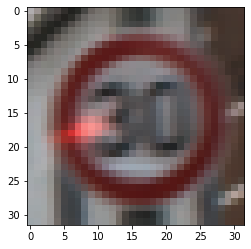

In [16]:
i = 2601
plt.imshow(X_train[i]) # Show images are not shuffled
y_train[i]

10

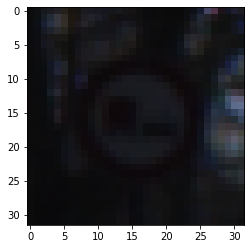

In [23]:
i = 5699
plt.imshow(X_train[i]) # Show images are not shuffled
y_train[i]

# **Data Prep**

you have to shuffle the dataset

In [17]:
## Shuffle the dataset 
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

convert into greyscale

In [18]:
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_test_gray  = np.sum(X_test/3, axis=3, keepdims=True)
X_validation_gray  = np.sum(X_validation/3, axis=3, keepdims=True) 

normalise

In [19]:
X_train_gray_norm = (X_train_gray - 128)/128 
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128

In [20]:
X_train_gray.shape

(34799, 32, 32, 1)

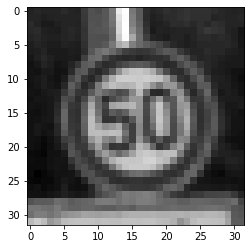

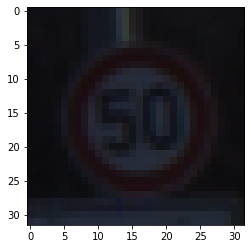

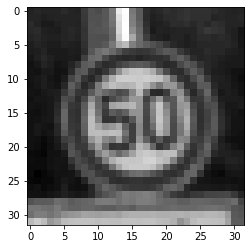

In [21]:
i = 770
plt.imshow(X_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap='gray');

# **Train Model**

- MODEL TRAINING

The model consists of the following layers:


- **STEP 1: THE FIRST CONVOLUTIONAL LAYER #1**


- Input = 32x32x1

- Output = 28x28x6

- Output = (Input-filter+1)/Stride* => (32-5+1)/1=28

- Used a 5x5 Filter with input depth of 3 and output depth of 6

- Apply a RELU Activation function to the output

- pooling for input, Input = 28x28x6 and Output = 14x14x6

- Stride is the amount by which the kernel is shifted when the kernel is passed over the image.



- **STEP 2: THE SECOND CONVOLUTIONAL LAYER #2**


- Input = 14x14x6

- Output = 10x10x16

- Layer 2: Convolutional layer with Output = 10x10x16

- Output = (Input-filter+1)/strides => 10 = 14-5+1/1

- Apply a RELU Activation function to the output

- Pooling with Input = 10x10x16 and Output = 5x5x16



- **STEP 3: FLATTENING THE NETWORK**


- Flatten the network with Input = 5x5x16 and Output = 400



- STEP 4: FULLY CONNECTED LAYER

-  Layer 3: Fully Connected layer with Input = 400 and Output = 120
-  Apply a RELU Activation function to the output



- STEP 5: ANOTHER FULLY CONNECTED LAYER

 - Layer 4: Fully Connected Layer with Input = 120 and Output = 84
- Apply a RELU Activation function to the output

- **STEP 6: FULLY CONNECTED LAYER**

Layer 5: Fully Connected layer with Input = 84 and Output = 43

In [24]:
# Import train_test_split from scikit library

#from keras.optimizers import adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout # dropout is a regularization technique
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

from sklearn.model_selection import train_test_split

In [25]:
image_shape = X_train_gray[i].shape

In [26]:
image_shape

(32, 32, 1)

In [27]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters=6, kernel_size=(10, 10), activation='relu', input_shape=(32,32,1)))
cnn_model.add(AveragePooling2D())

cnn_model.add(Conv2D(filters=16, kernel_size=(10, 10), activation='relu'))
cnn_model.add(MaxPooling2D())

cnn_model.add(Flatten())

cnn_model.add(Dense(units=240, activation='relu'))

cnn_model.add(Dense(units=168, activation='relu'))

cnn_model.add(Dense(units=43, activation = 'softmax'))

In [28]:
opt = Adam(learning_rate=0.01,name='Adam')

In [29]:
#cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam', metrics =['accuracy'])

In [30]:
history = cnn_model.fit(X_train_gray_norm,
                        y_train,
                        batch_size=500,
                        epochs=50,
                        verbose=1,
                        validation_data = (X_validation_gray_norm,y_validation))

Epoch 1/50
70/70 [==============================] - 4s 49ms/step - loss: 3.2057 - accuracy: 0.1574 - val_loss: 2.7918 - val_accuracy: 0.2506
Epoch 2/50
70/70 [==============================] - 3s 45ms/step - loss: 1.7002 - accuracy: 0.5099 - val_loss: 1.3758 - val_accuracy: 0.5896
Epoch 3/50
70/70 [==============================] - 3s 45ms/step - loss: 0.9274 - accuracy: 0.7256 - val_loss: 0.9876 - val_accuracy: 0.7086
Epoch 4/50
70/70 [==============================] - 3s 47ms/step - loss: 0.6697 - accuracy: 0.8074 - val_loss: 0.8305 - val_accuracy: 0.7726
Epoch 5/50
70/70 [==============================] - 4s 56ms/step - loss: 0.5270 - accuracy: 0.8522 - val_loss: 0.7263 - val_accuracy: 0.7934
Epoch 6/50
70/70 [==============================] - 4s 52ms/step - loss: 0.4305 - accuracy: 0.8821 - val_loss: 0.7047 - val_accuracy: 0.8177
Epoch 7/50
70/70 [==============================] - 4s 53ms/step - loss: 0.3772 - accuracy: 0.8981 - val_loss: 0.6376 - val_accuracy: 0.8263
Epoch 8/50
70

# **Model Evaluation**

In [31]:
score = cnn_model.evaluate(X_test_gray_norm, y_test,verbose=0)
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Accuracy : 0.8777


In [32]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

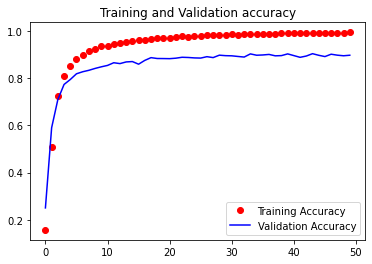

In [33]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'ro', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()


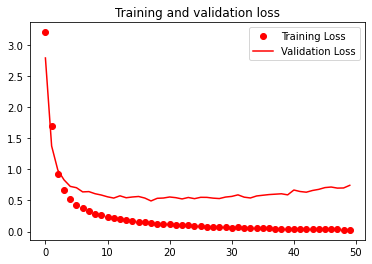

In [34]:
plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [36]:
#get the predictions for the test data
predicted_classes = cnn_model.predict_classes(X_test_gray_norm)
#get the indices to be plotted
y_true = y_test


<AxesSubplot:>

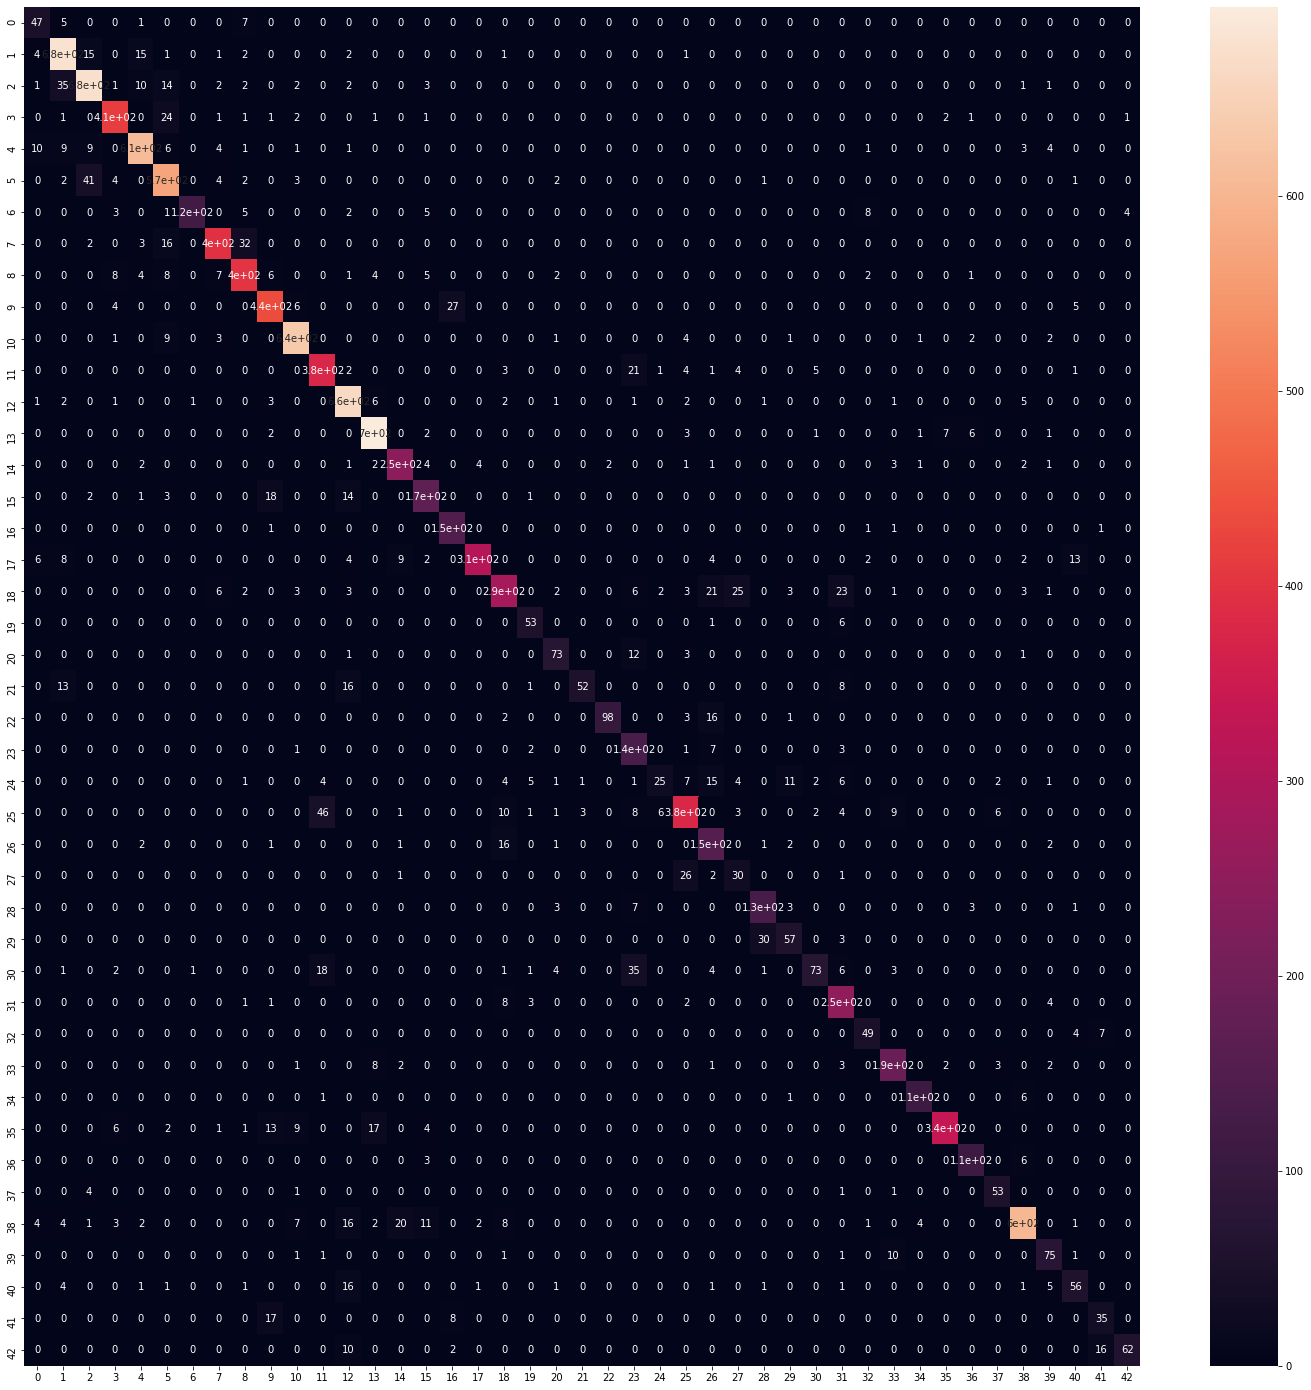

In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25,25))
sns.heatmap(cm, annot=True)

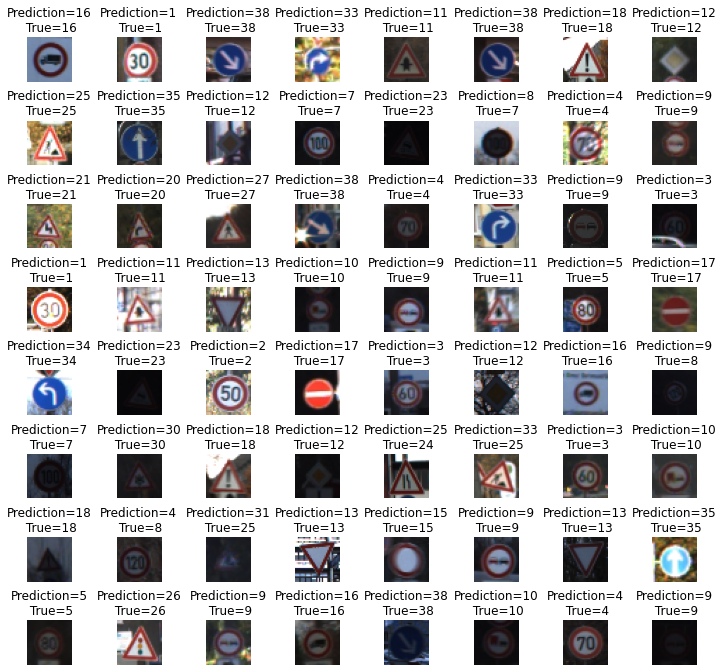

In [40]:
L = 8
W = 8
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title("Prediction={}\n True={}".format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)